from param_analysis import ParameterAnalysis
from plots import *

In [1]:
from param_analysis import ParameterAnalysis
from plots import *

What I have found so far is that with really high ecb values like 9, agents make up their mind super quickly. then they only tweet one thing no matter what they read, they end up tweeting whatever is the majority belief of their neighbours, and they don't bother choosing not to sample the agents that disagree because the amount which these agents affect their beliefs has negligible towards actually changing opinion. 

In contrast with lower ecb values like 5, agents can tend to never make up their minds. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
connectedness_values = [0.2, 0.5, 0.8]
ecb_precision_gammas = [2,4,7,9]

num_agent_values = [3,5]
#num_agent_values = [4,10]

n = len(num_agent_values)
c = len(connectedness_values)
#precision_ranges = [[1,2],[1,5],[1,9],[6,7],[6,10]]
env_precision_gammas = [9]
b_precision_gammas = [2,4,7,9]
lr = [0.01,0.3,0.6]

variances = [0.1,1,2]

r_len = len(ecb_precision_gammas)
e_len = len(env_precision_gammas)
b_len = len(b_precision_gammas)
v_len = len(variances)
lr_len = len(lr)
n_trials = 30


In [4]:
params = ParameterAnalysis('results/E_r.npz','', num_agent_values, connectedness_values, ecb_precision_gammas, env_precision_gammas, b_precision_gammas, lr, variances, n_trials)

FileNotFoundError: [Errno 2] No such file or directory: 'results/E_r.npz'

In [5]:
params.n_d.value = num_agent_values[1]
params.env_d.value = env_precision_gammas[0]
params.b_d.value = b_precision_gammas[0]
params.c_d.value = connectedness_values[1]
params.ecb_d.value = ecb_precision_gammas[-2]
params.v_d.value = variances[0]
params.lr_d.value = lr[0]

NameError: name 'params' is not defined

In [351]:
params.get_overall_metrics()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/daphnedemekas/Desktop/Imperial/Thesis/active_inference_opinion_dynamics/Analysis/cluster_metrics.py:86: RuntimeWarning: divide by zero encountered in double_scalars
  ratio_per_section[s_idx] = np.nanmean(outsider_average) / np.nanmean(insider_average)


KeyboardInterrupt: 

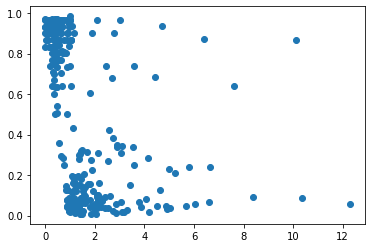

In [10]:
plt.scatter(params.insider_outsider_ratios[:,-1], params.db_indices)
plt.show()

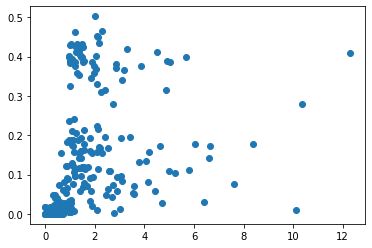

In [11]:
plt.scatter(params.insider_outsider_ratios[:,-1], params.cluster_kls)
plt.show()

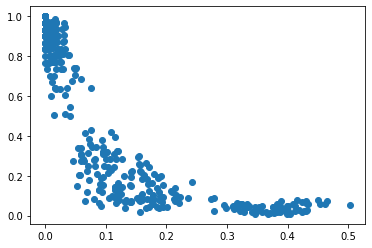

In [33]:
plt.scatter(params.cluster_kls, params.db_indices)
plt.show()

In [13]:
all_parameters = np.array(list(params.get_param_combinations()))

In [111]:
one_cluster_indices = np.where(np.isnan(params.insider_outsider_ratios[:,-1]))[0]

In [195]:
clustering_indices = np.where(~np.isnan(params.insider_outsider_ratios[:,-1]))[0]
#clustering_indices_db = np.where(params.db_indices < 1)[0]

clustering_params = all_parameters[clustering_indices]
clustering_ratios = params.insider_outsider_ratios[clustering_indices]

In [183]:
def plot_param_histograms(conditional_params):
    fig, axs = plt.subplots(3, 2, figsize=(10,10))
    axs[0, 0].hist(conditional_params[:,0])
    axs[0,0].set_title("Number of Agents")
    axs[0, 1].hist(conditional_params[:,1])
    axs[0,1].set_title("Network Connectedness")

    axs[1, 0].hist(conditional_params[:,2])
    axs[1,0].set_title("ECB Precision")

    axs[1, 1].hist(conditional_params[:,3])
    axs[1,1].set_title("Belief Precision")

    axs[2, 0].hist(conditional_params[:,5])
    axs[2,0].set_title("Variance")

    axs[2, 1].hist(conditional_params[:,6])
    axs[2,1].set_title("Learning Rate")


Parameter configuration that leads to clustering in general


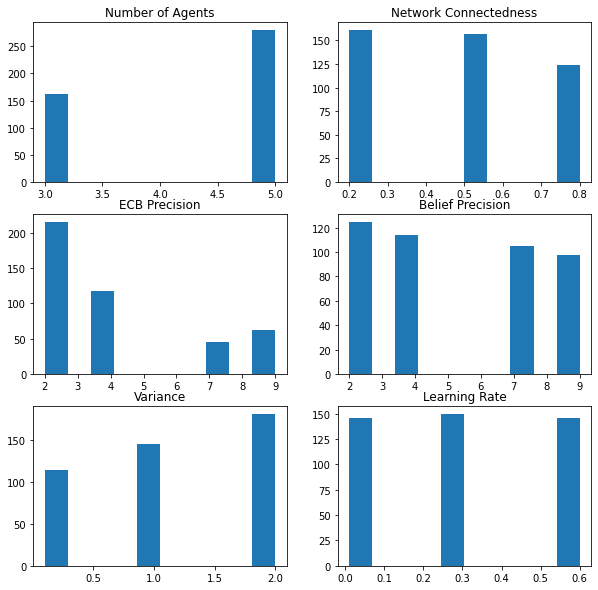

In [184]:
print("Parameter configuration that leads to clustering in general")
plot_param_histograms(clustering_params)

In [115]:
#other interesting measures of clustering is the nonzero KL divergences, and db indices which are not 1 
#np.mean(params.db_indices[non_zero_kls])

[ 36  37  38  40  41  43  44  45  46  50  90  91  95  96 100 103 104 143
 145 147 148 150 151 152 153 154 157 158 161 198 199 200 201 202 206 207
 208 212 217 218 224 225 227 228 229 230 231 232 233 234 235 237 238 239
 241 242 243 245 246 247 251 253 254 256 257 258 259 260 261 262 263 265
 266 267 268 306 307 308 312 313 314 315 319 320 321 322 326 327 328 333
 335 337 338 339 340 341 342 343 344 345 346 349 353 357 358 359 362 363
 364 365 366 367 368 369 370 371 372 409 411 412 415 419 423 424 425 426
 427 428 431 432 433 434 435 436 437 438 439 440 441]


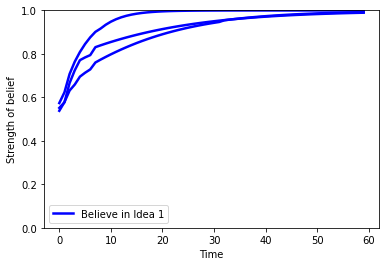

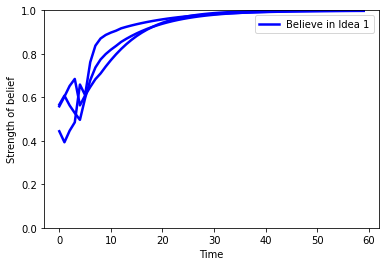

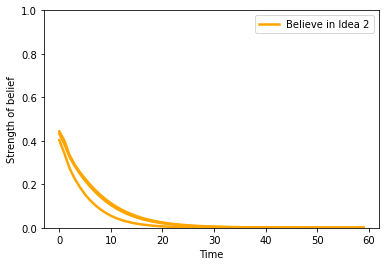

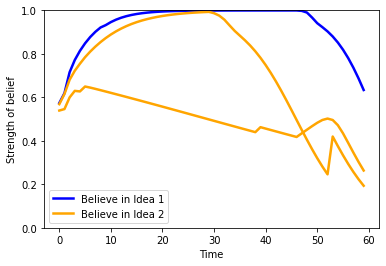

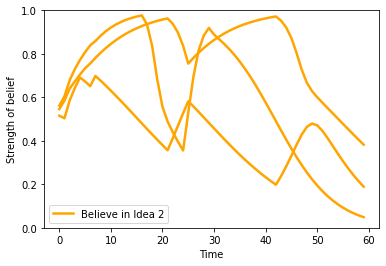

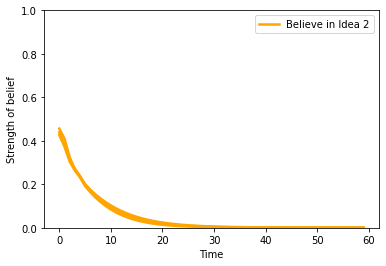

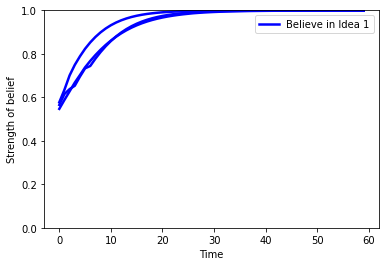

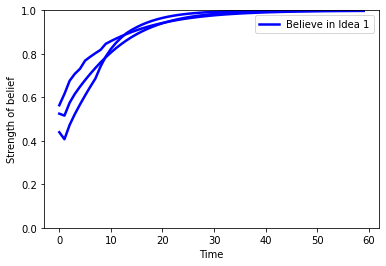

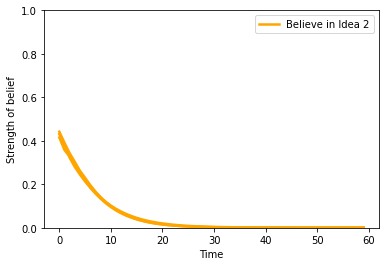

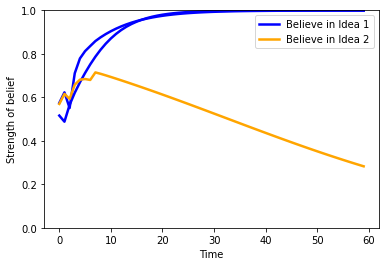

In [350]:
min_db = np.where(params.db_indices[clustering_indices] >0.9)[0]
print(min_db)
params.update_params(clustering_params[min_db[15]])
params.get_all_sim_results_from_parameters()
for i in range(10):
    plot_beliefs_over_time(params.all_qs[i])
    plt.show()

In [226]:
print("The number of parameter configurations in which agents are able to form two discrete clusters is " + str(len(clustering_indices)))

The number of parameter configurations in which agents are able to form two discrete clusters is 442


In [227]:
insiders_dominate = np.where(clustering_ratios[:,-1] <= 1)[0]
insiders_params = clustering_params[insiders_dominate]
insiders_ratios = clustering_ratios[insiders_dominate]


Parameter configuration that leads to insider sampling dominating


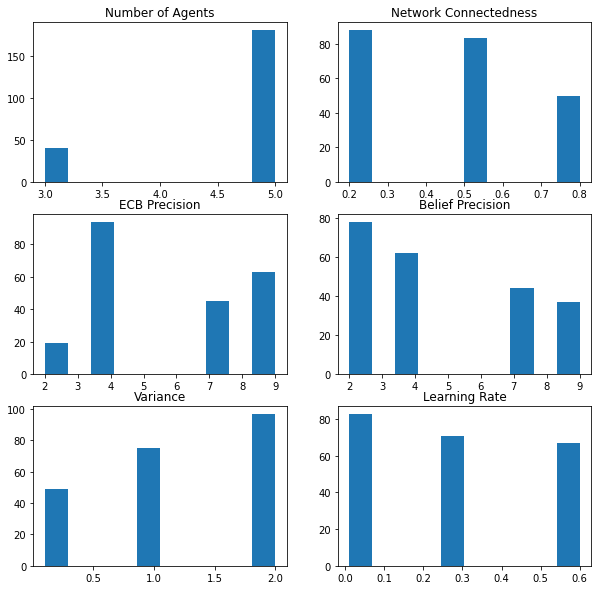

In [228]:
print("Parameter configuration that leads to insider sampling dominating")
plot_param_histograms(insiders_params)

In [125]:
print("The number of parameter configurations in which agents end up sampling insiders more than outsiders is " + str(len(insiders_dominate)))

The number of parameter configurations in which agents end up sampling insiders more than outsiders is 221


In [288]:
periodic_indices = np.where(np.absolute(clustering_ratios[:,-1] - clustering_ratios[:,0]) < 0.07)[0]
print("The number of configurations that lead to periodic sampling behaviour is " + str(len(periodic_indices)))
periodic_params = clustering_params[periodic_indices]
periodic_ratios = clustering_ratios[periodic_indices]

The number of configurations that lead to periodic sampling behaviour is 67


<ipython-input-288-2e505d6073b5>:1: RuntimeWarning: invalid value encountered in subtract
  periodic_indices = np.where(np.absolute(clustering_ratios[:,-1] - clustering_ratios[:,0]) < 0.07)[0]


Parameter configuration that leads to insider sampling dominating


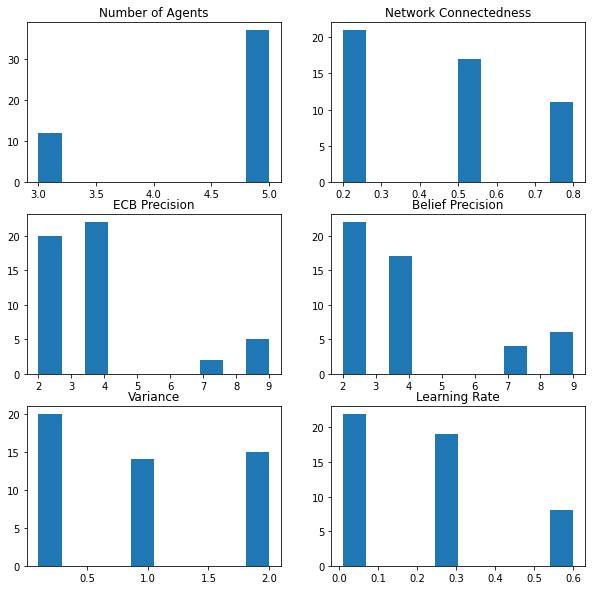

In [285]:
print("Parameter configuration that leads to insider sampling dominating")
plot_param_histograms(periodic_params)

In [213]:
biggest_insider_skew = np.where(clustering_ratios[:,0] - clustering_ratios[:,-1] > 0.3)[0]
print(len(biggest_insider_skew))
insider_skew_params = clustering_params[biggest_insider_skew]
insider_skew_ratios = clustering_ratios[biggest_insider_skew]

42


<ipython-input-213-a1da5a7ede6a>:1: RuntimeWarning: invalid value encountered in subtract
  biggest_insider_skew = np.where(clustering_ratios[:,0] - clustering_ratios[:,-1] > 0.3)[0]


Parameter configuration that leads to insider sampling dominating


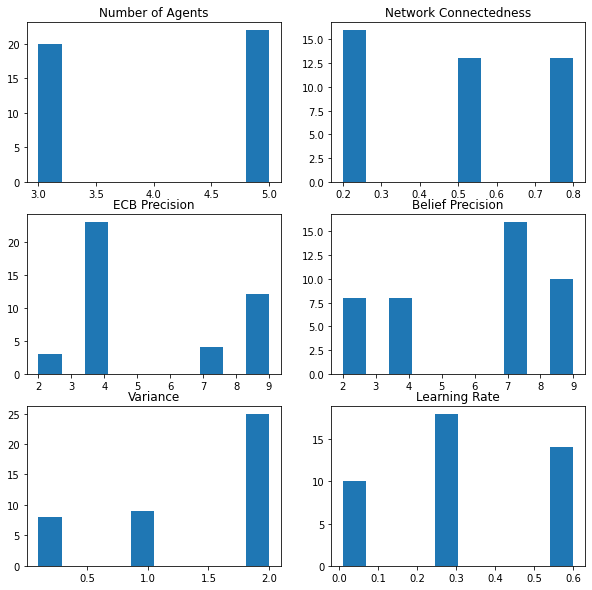

In [214]:
print("Parameter configuration that leads to insider sampling dominating")
plot_param_histograms(insider_skew_params)

[[1.76341709 2.4769164  2.87367879]
 [0.67624496 1.0081772  1.06548498]
 [0.39222309 0.30199884 0.24587807]
 [0.33553496 0.33433497 0.22196935]]


Text(0.5, 1.0, 'Histogram for insider outsider sampling ratio on configurations that tend to cluster')

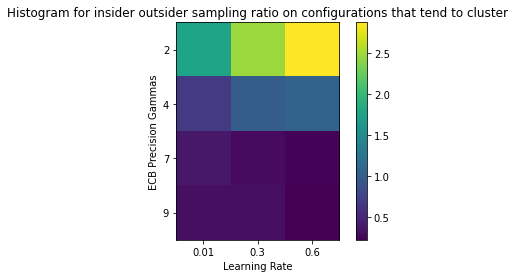

In [270]:
ecb_learning_ratio_general_hist = get_2d_histogram(ecb_precision_gammas, lr, all_parameters, params.insider_outsider_ratios, 2, -1)
print(ecb_learning_ratio_general_hist)
plot_2d_histogram(ecb_learning_ratio_general_hist, "Learning Rate", "ECB Precision Gammas", ecb_precision_gammas, lr)
plt.title("Histogram for insider outsider sampling ratio on configurations that tend to cluster")

[[1.76341709 2.4769164  2.87367879]
 [0.67624496 1.0081772  1.06548498]
 [0.39222309 0.30199884 0.24587807]
 [0.33553496 0.33433497 0.22196935]]


Text(0.5, 1.0, 'Histogram for insider outsider sampling ratio on configurations that tend to cluster')

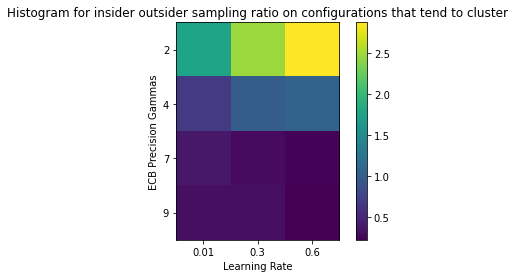

In [271]:
ecb_learning_ratio_clustering_hist = get_2d_histogram(ecb_precision_gammas, lr, clustering_params, clustering_ratios, 2, -1)
print(ecb_learning_ratio_clustering_hist)
plot_2d_histogram(ecb_learning_ratio_clustering_hist, "Learning Rate", "ECB Precision Gammas", ecb_precision_gammas, lr)
plt.title("Histogram for insider outsider sampling ratio on configurations that tend to cluster")

[[2.29700536 2.30335246 2.17795886]
 [0.64880068 0.45903624 1.21480952]
 [0.44719354 0.31480301 0.22024874]
 [0.36923268 0.30021865 0.25957114]]


Text(0.5, 1.0, 'Histogram for insider outsider sampling ratio on configurations that tend to cluster')

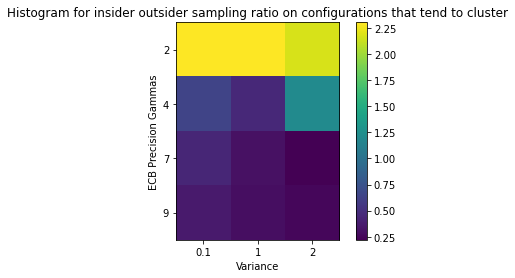

In [310]:
ecb_variance_clustering_hist = get_2d_histogram(ecb_precision_gammas, variances, clustering_params, clustering_ratios, 2, -2)
print(ecb_variance_clustering_hist)
plot_2d_histogram(ecb_variance_clustering_hist, "Variance", "ECB Precision Gammas", ecb_precision_gammas, variances)
plt.title("Histogram for insider outsider sampling ratio on configurations that tend to cluster")

[[1.56771823 1.68692182 2.43215659 2.20749035]
 [0.98798893 0.70479711 0.89012537 0.91627419]
 [0.377057   0.44048614 0.34506409 0.19731498]
 [0.37313898 0.40327178 0.39758212 0.32956434]]


Text(0.5, 1.0, 'Histogram for insider outsider sampling ratio on configurations that tend to cluster')

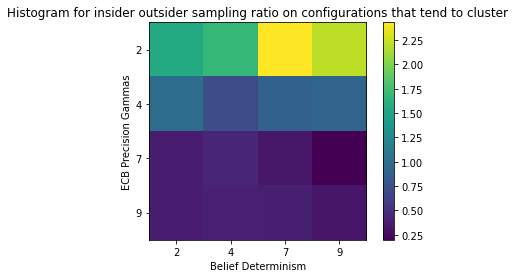

In [336]:
ecb_variance_clustering_hist = get_2d_histogram(ecb_precision_gammas, b_precision_gammas, clustering_params, clustering_ratios, 2, 3)
print(ecb_variance_clustering_hist)
plot_2d_histogram(ecb_variance_clustering_hist, "Belief Determinism", "ECB Precision Gammas", ecb_precision_gammas, b_precision_gammas)
plt.title("Histogram for insider outsider sampling ratio on configurations that tend to cluster")

[[1.52693437 1.8820118  2.99086811 3.39193903]
 [0.72949232 0.6481462  1.29097864 1.05485777]
 [0.32794853 0.39764637 0.27290174 0.14347961]
 [0.30632522 0.33895602 0.32617691 0.21693618]]


Text(0.5, 1.0, 'Histogram for insider outsider sampling ratio on configurations that tend to cluster')

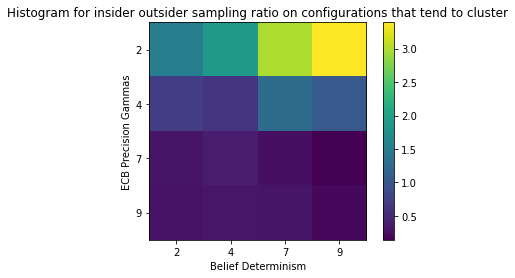

In [314]:
ecb_b_clustering_hist = get_2d_histogram(ecb_precision_gammas, b_precision_gammas, clustering_params, clustering_ratios, 2, 3)
print(ecb_b_clustering_hist)
plot_2d_histogram(ecb_b_clustering_hist, "Belief Determinism", "ECB Precision Gammas", ecb_precision_gammas, b_precision_gammas)
plt.title("Histogram for insider outsider sampling ratio on configurations that tend to cluster")

[[0.08992346 0.11412212 0.12485454 0.13306907]
 [0.08976646 0.11037158 0.11261024 0.11136397]
 [0.08672393 0.10475726 0.11968161 0.12416993]]


Text(0.5, 1.0, 'Histogram for insider outsider sampling ratio on configurations that tend to cluster')

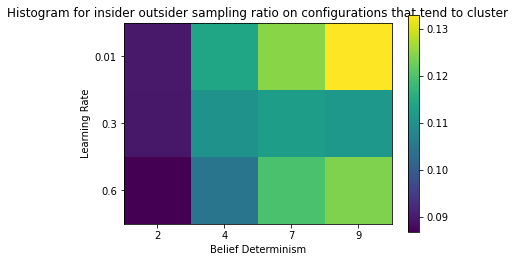

In [334]:
ecb_b_clustering_hist = get_2d_histogram(lr, b_precision_gammas, clustering_params, params.cluster_kls[clustering_indices], -1, 3)
print(ecb_b_clustering_hist)
plot_2d_histogram(ecb_b_clustering_hist, "Belief Determinism", "Learning Rate", lr, b_precision_gammas)
plt.title("Histogram for insider outsider sampling ratio on configurations that tend to cluster")

In [317]:
params.db_indices[clustering_ratios]

IndexError: arrays used as indices must be of integer (or boolean) type

[[0.83459565 0.92111302 0.95554166 0.86248469]
 [0.57076085 0.48081654 0.34366341 0.44884197]
 [0.32794853 0.39764637 0.27290174 0.14347961]
 [0.30632522 0.33895602 0.32617691 0.21693618]]


Text(0.5, 1.0, 'Histogram for insider outsider sampling ratio on configurations that tend to cluster')

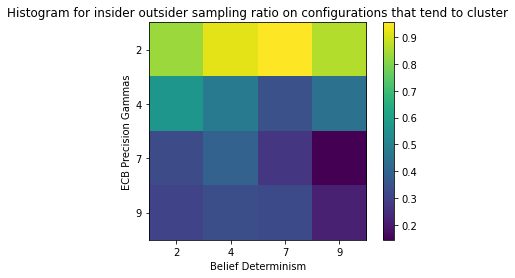

In [321]:
ecb_b_clustering_hist = get_2d_histogram(ecb_precision_gammas, b_precision_gammas, insiders_params, insiders_ratios[:,-1], 2, 3)
print(ecb_b_clustering_hist)
plot_2d_histogram(ecb_b_clustering_hist, "Belief Determinism", "ECB Precision Gammas", ecb_precision_gammas, b_precision_gammas)
plt.title("Histogram for insider outsider sampling ratio on configurations that tend to cluster")

Here a darker value means more insider sampling is happening and a lighter color, higher ratio, means less. So we can see that high ECB precision leads to more insider domination in sampling, and in general, where we have lower ECB precision, higher learning rates lead to a larger ratio. This makes sense because the agent will want to keep sampling who they have been sampling before, and with low ECB and no incentivize to cluster, this will lead to a higher sampling ratio

Text(0.5, 1.0, 'Histogram for insider outsider sampling ratio on configurations where periodic behaviour dominates')

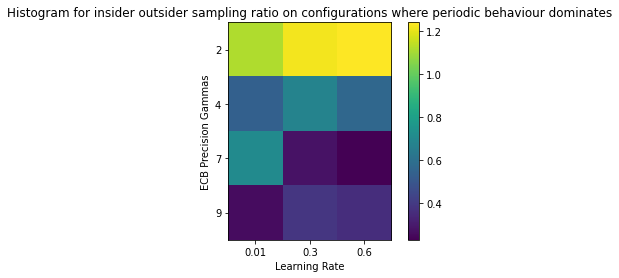

In [320]:
ecb_learning_ratio_periodic_hist = get_2d_histogram(ecb_precision_gammas, lr, periodic_params, periodic_ratios[:,-1], 2, -1)
plot_2d_histogram(ecb_learning_ratio_periodic_hist, "Learning Rate", "ECB Precision Gammas", ecb_precision_gammas, lr)
plt.title("Histogram for insider outsider sampling ratio on configurations where periodic behaviour dominates")

But if we condition on the insiders dominating then we can see that the trend is switched, and now a high learning rate leads to a higher outsider-to-insider ratio where we have low ECB precision, which makes sense because it is going against the condition of insiders dominating. 

In [319]:
#I want to take the outsider sampling frequency and plot a histogram across belief precision and learning rate for the clustering data 

def get_2d_histogram(param1, param2, conditional_parameters, conditional_metric, param1_index, param2_index):
    hist = np.zeros((len(param1), len(param2)))
    for i, e in enumerate(param1):
        indices = np.where(conditional_parameters[:,param1_index] == e)[0]
        _params = conditional_parameters[indices]
        metrics = conditional_metric[indices]
        for j, l in enumerate(param2):
            p2_indices = np.where(_params[:,param2_index]==l)[0]
            p2_params = _params[p2_indices]
            p2_metrics = metrics[p2_indices]
            avg_metric = np.nanmean(p2_metrics[np.isfinite(p2_metrics)])
            hist[i,j] = avg_metric
    return hist

def plot_2d_histogram(hist, x_label, y_label, param1, param2):

    plt.imshow(hist)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax = plt.gca()
    ax.set_xticks(np.arange(0,len(param2),1))
    ax.set_yticks(np.arange(0,len(param1),1))
    ax.set_xticklabels(param2)
    ax.set_yticklabels(param1)
    plt.colorbar()
    #    list_of_outsider_metrics = np.where(clustering_ratios

In [247]:
np.mean([0.54002079 0.38737649 0.08695652 1.         0.26806885 0.300899
 0.63265306 0.41228444 0.12554113 0.37012012 0.3559322  0.42857143
 0.19047619])

SyntaxError: invalid syntax (<ipython-input-247-54ff98d1b27c>, line 1)

In [229]:
lr

[0.01, 0.3, 0.6]

In [28]:
%config InlineBackend.figure_format = 'svg'


In [217]:
def similarity_matrix(belief_hist):
    T = belief_hist.shape[0]

    KLD_intra_beliefs = get_KLDs(belief_hist)
    believers = np.where(belief_hist[-1,0,:] > 0.5)
    nonbelievers = np.where(belief_hist[-1,0,:] < 0.5)
    cluster_sorted_indices = [i for i in believers[0]]
    for j in nonbelievers[0]:
        cluster_sorted_indices.append(j)

    
    color_map = plt.cm.get_cmap('gray').reversed()


    single_slice = KLD_intra_beliefs[:,:,-1]
    sorted_slice = single_slice[cluster_sorted_indices,:][:,cluster_sorted_indices]
    plt.imshow(sorted_slice, cmap = color_map)
    plt.title("Belief similarity matrix")
    plt.show()
    plt.clf()

In [224]:

#num agents, connectedness, ecb precision, env precision, b precision, lr, variance 
optimal_params = clustering_params[-1]
params.update_params(optimal_params)
params.get_all_sim_results_from_parameters()
beliefs = params.all_qs

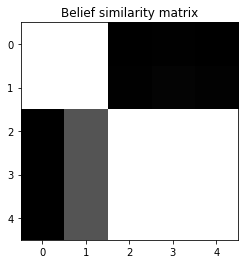

<Figure size 432x288 with 0 Axes>

In [225]:
kld_matrices = similarity_matrix(beliefs[2])

In [24]:
def get_agent_data(agent, result, cluster1, cluster2):
    agent_adj_mat = result['adj_mat'][:,agent,:]
    agent_beliefs = result['all_qs'][:,:,:,agent]
    agent_samplings = result['all_neighbour_sampling'][:,:,agent]
    agent_tweets = result['all_tweets'][:,:,agent]
    agent_cluster = cluster1[0] if agent in cluster1[0] else cluster2[0]
    other_cluster = cluster1[0] if agent not in cluster1[0] else cluster2[0]
    neighbours = list(is_connected(agent_adj_mat[0])[0])
    outsider_neighbours = np.intersect1d(neighbours, other_cluster)
    insider_neighbours = np.intersect1d(neighbours, agent_cluster)
    
    agent_data = (agent_adj_mat, agent_beliefs, agent_samplings, agent_tweets, agent_cluster, other_cluster, neighbours, outsider_neighbours, insider_neighbours)
    return agent_data

def find_one_agent_two_neighbours_opposite_cluster(parameters, condition = True, trial = None, agent = None):
    params.update_params(parameters)
    beliefs = params.all_qs
    result = params.get_all_sim_results_from_parameters()
    if condition == True:
        for trial in range(30):
                #what are the clusters? 
            all_beliefs_t = beliefs[trial]
            cluster1 = np.where(all_beliefs_t[-1,1,:] > 0.5)
            cluster2 = np.where(all_beliefs_t[-1,1,:] < 0.5)
            for agent in range(parameters[0]):
                agent_data = get_agent_data(agent,result, cluster1, cluster2)
                if len(agent_data[-3]) == 2 and len(agent_data[-2]) == 1 and len(agent_data[-1]) == 1:
                    print("Found condition!")
                    print(cluster1)
                    print(cluster2)
                    return result, trial, agent, cluster1, cluster2, agent_data
    else:
        all_beliefs_t = beliefs[trial,:,:,:] 
        cluster1 = np.where(all_beliefs_t[-1,1,:] > 0.5)
        cluster2 = np.where(all_beliefs_t[-1,1,:] < 0.5)
        agent_data = get_agent_data(agent,result, cluster1, cluster2)
                    
        return result, trial, agent, cluster1, cluster2, agent_data
            

In [25]:
def is_connected(adj_mat):
    return np.where(adj_mat == 1)

In [426]:
test_params = all_params[1]
params.update_params(test_params)
beliefs = params.all_qs


In [344]:
result, trial, agent, cluster1, cluster2, agent_data = find_one_agent_two_neighbours_opposite_cluster(test_params)

Found condition!
(array([0, 3, 4]),)
(array([1, 2]),)


In [439]:
result, trial, agent, cluster1, cluster2, agent_data = find_one_agent_two_neighbours_opposite_cluster(test_params, False, 4, 0)

In [440]:
trial

4

In [441]:
(agent_adj_mat, agent_beliefs, agent_samplings, agent_tweets, agent_cluster, other_cluster, neighbours, outsider_neighbours, insider_neighbours) = agent_data

In [442]:
agent_samplings[trial]

array([1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1.,
       1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2., 1., 1., 2.,
       1., 1., 2., 1., 1., 2., 1., 1., 2., 1.])

In [443]:
outsider_indices = [np.where(agent_samplings[trial] == i) for i in outsider_neighbours]
insider_indices = [np.where(agent_samplings[trial] == i) for i in insider_neighbours]

In [444]:
insider_indices

[(array([ 0,  1,  3,  4,  6,  7,  9, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21,
         22, 24, 25, 27, 28, 30, 31, 33, 34, 36, 37, 39, 40, 42, 43, 45, 46,
         48, 49, 51, 52, 54, 55, 57, 58, 60]),)]

In [55]:
def sampling_data(all_sampling_data, idx, parameters, all_qs, adj_mat, all_samplings):
    all_sampling_data[idx] = {}
    for trial in range(30):
        #print()
        #print("trial: "  + str(trial))
            #what are the clusters? 
        cluster1 = np.where(all_qs[trial][-1,1,:] > 0.5)
        cluster2 = np.where(all_qs[trial][-1,1,:] < 0.5)
        if len(cluster1[0]) > 0 and len(cluster2[0]) > 0:
            all_sampling_data[idx][trial] = {}

            for agent in range(parameters[0]):
                #print("Agent: " + str(agent))
                agent_cluster = cluster1[0] if agent in cluster1[0] else cluster2[0]
                other_cluster = cluster1[0] if agent not in cluster1[0] else cluster2[0]
                try:
                    neighbours = list(np.where(adj_mat[:,agent,:][0] ==1)[0])
                except:
                    print(agent)
                    print(adj_mat.shape)
                    print(p)
                outsider_neighbours = np.intersect1d(neighbours, other_cluster)
                insider_neighbours = np.intersect1d(neighbours, agent_cluster)
                if len(outsider_neighbours) > 0 and len(insider_neighbours) > 0:
                    agent_samplings = all_samplings[:,:,agent][trial]
                    outsider_indices = [np.where(agent_samplings == i) for i in outsider_neighbours]
                    insider_indices = [np.where(agent_samplings == i) for i in insider_neighbours]
                    all_sampling_data[idx][trial][agent] = {}
                    for j in range(len(outsider_indices)):
                        #outsider_freq = [outsider_indices[j][0][i+1]-outsider_indices[j][0][i] for i in range(len(outsider_indices[j][0])-1)]
                        #print("outsider frequency: " + str(outsider_freq))
                        all_sampling_data[idx][trial][agent]["outsider_indices"] = []
                        all_sampling_data[idx][trial][agent]["outsider_indices"].append(outsider_indices[j][0])
                        all_sampling_data[idx][trial][agent]["outsider_neighbours"] = outsider_neighbours

                    for k in range(len(insider_indices)):
                        #insider_freq = [insider_indices[k][0][i+1]-insider_indices[k][0][i] for i in range(len(insider_indices[k][0])-1)]
                        #print("insider frequency: " + str(insider_freq))
                        all_sampling_data[idx][trial][agent]["insider_indices"] = []
                        all_sampling_data[idx][trial][agent]["insider_indices"].append(insider_indices[k][0])
                        all_sampling_data[idx][trial][agent]["insider_neighbours"] = insider_neighbours

    return all_sampling_data

        

In [501]:
params

In [27]:
all_params = list(params.get_param_combinations())
all_sampling_data = {}
for idx, p in enumerate(all_params):
    params.update_params(p)
    params.get_all_sim_results_from_parameters()
    all_sampling_data = sampling_data(all_sampling_data, idx, p, params.all_qs, params.adj_mat, params.all_neighbour_samplings)


In [22]:
x = all_params.index(tuple(optimal_params))

In [23]:
x

30

In [34]:
outsider_indices = all_sampling_data[x][10][2]["outsider_indices"]
insider_indices = all_sampling_data[x][10][2]["insider_indices"]
outsider_neighbours = all_sampling_data[x][10][2]["outsider_neighbours"]
insider_neighbours = all_sampling_data[x][10][2]["insider_neighbours"]


In [68]:
#plt.plot(range(61), agent_samplings[trial])
def plot_samples(outsider_indices, insider_indices, outsider_neighbours, insider_neighbours):
    if len(outsider_indices) > 0:
        for j in range(len(outsider_indices)):
            plt.scatter(outsider_indices[j], np.tile(0, len(outsider_indices[j])), color = 'green', label = "outsider")
    for i in range(len(insider_indices)):
        plt.scatter(insider_indices[i], np.tile(1, len(insider_indices[i])), color = 'orange', label = "insider")
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Agent Sampling")
    plt.title("Sampling Behaviour")

In [328]:
agent_reads = [result['all_tweets'][trial,t,int(a)] for t,a in enumerate(agent_samplings[trial,:])]

In [ ]:
#average number of outsider samplings per agent at the final 20 timesteps 
#average over agents and trial 
#2d heat map of the ratios over beleif precision / learning rate / ecb precision 


#for just ecb precision could just have curves over time and y being the frequency sampling ratio 

#tensor of parameters (ecb, belief, learning rate) and then each entry is the average for fixed parameter respectively
#plt.imshow on a slice of that cube 


In [335]:
behaviour = [( agent_tweets[trial][t], agent_reads[t], agent_beliefs[trial,:,0][t], (agent_beliefs[trial,:,0][t] - agent_beliefs[trial,:,0][t-1] )) for t in range(1,len(agent_reads)-1)]

So two general behaviours are possible: Either an agent will form a conclusion by choosing to more frequently sample within one cluster group than the other, or they will continue to sample from both cluster groups and remain centrist. In both cases, agents will choose their own leaning - only to tweet one hashtag over the other, but will continue to sample both leanings, to varying frequencies based on their beliefs.  

Text(0.5, 1.0, 'Effect of Belief Precision on Sampling Frequency')

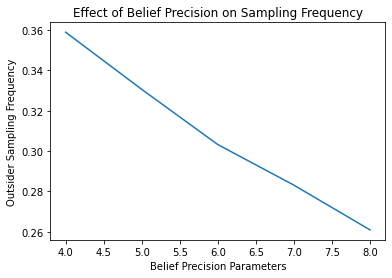

In [113]:
plt.plot(b_precision_gammas[1:], sampling_data[1:])
plt.xlabel("Belief Precision Parameters")
plt.ylabel("Outsider Sampling Frequency")
plt.title("Effect of Belief Precision on Sampling Frequency")